# Exploratory Data Analysis

In [2]:
# Script to bring the videos to my directory. (train, val and test)

import os
import json

def walkdir(folder):
    ''' Directories function '''
    for dirpath, _, files in os.walk(folder):
        for filename in files:
            yield (dirpath, filename)


# Json file
with open('/home/data-proyect/v1_split_trailer.json', 'r') as file:
    data = json.load(file)


pos = '/home/data-proyect/trailer/'

os.makedirs('./../data/train', exist_ok=True)
os.makedirs('./../data/val', exist_ok=True)
os.makedirs('./../data/test', exist_ok=True)

# Counters
c_train = 0
c_test = 0
c_val = 0
none = 0

# ---- Main program ----

for dir,filename in walkdir(pos):
    folder = (dir[len(dir)-9:len(dir)])
    if folder in data['train']:
        c_train = c_train+1
        src = os.path.join(pos, folder + "/" + filename)
        os.makedirs('./../data/train/' + folder, exist_ok=True)
        os.link(src, os.path.join('./../data/train/', folder + "/" + filename))
    elif folder in data['test']:
        c_test = c_test + 1
        src = os.path.join(pos, folder + "/" + filename)
        os.makedirs('./../data/test/' + folder, exist_ok=True)
        os.link(src, os.path.join('./../data/test/', folder + "/" + filename))
    elif folder in data['val']:
        c_val = c_val + 1
        src = os.path.join(pos, folder + "/" + filename)
        os.makedirs('./../data/val/' + folder, exist_ok=True)
        os.link(src, os.path.join('./../data/val/', folder + "/" + filename))
    else:
        pass


# Returns the number of folders for each assignment    
print('train: ',c_train)
print('test: ',c_test)
print('val: ',c_val)
print('none: ',none)

train:  20856
test:  8187
val:  4610
none:  0


In [15]:
import pandas as pd
import json
import cv2
from tqdm import tqdm
import os


with open('/home/data-proyect/v1_split_trailer.json', 'r') as file:
    data = json.load(file)

dfs = pd.DataFrame()

dfs['assignment'],
dfs['video'],dfs['scene'], 
dfs['scale_label'],
dfs['scale_value'], 
dfs['movement_label'], 
dfs['movement_value'], 
dfs['frames'], 
dfs['time(s)'], 
dfs['size(MB)'], 
dfs['dir'] = None, None, None, None, None, None, None, None, None, None, None


for j in tqdm(data, desc='Total'):
    for i in tqdm(data[j], desc='Sub-p'):
        
        for k in data[j][i]:
            
            d_scale_label = data[j][i][k]['scale']['label']
            
            d_scale_value = data[j][i][k]['scale']['value']
            
            d_movement_label = data[j][i][k]['movement']['label']
            
            d_movement_value = data[j][i][k]['movement']['value']
            
            mov = cv2.VideoCapture('./../data/' + j + '/' + i + '/shot_' + k + '.mp4')
            
            frames = mov.get(cv2.CAP_PROP_FRAME_COUNT) 
            fps = float(mov.get(cv2.CAP_PROP_FPS)) 
            seconds = f"{float(frames / fps):.02f}"
            
            length = int(mov.get(cv2.CAP_PROP_FRAME_COUNT))
            
            file_size = os.path.getsize(r'./../data/' + j + '/' + i + '/shot_' + k + '.mp4') 
            file_size = (f'{file_size/1048576:.02f}')

            dirr = './../data/' + j + '/' + i + '/shot_' + k + '.mp4'

            datev = {'assignment':j, 
                     'video':i, 
                     'scene':k, 
                     'scale_label':d_scale_label, 
                     'scale_value':d_scale_value, 
                     'movement_label':d_movement_label, 
                     'movement_value':d_movement_value,
                     'frames':length,
                     'time(s)':seconds,
                     'size(MB)':file_size,
                     'dir':dirr,
                    }
                     
            dfs = dfs.append(datev, ignore_index=True)

dfs.to_csv('dataset_video.csv', index=False)

Total: 100%|██████████| 3/3 [13:53<00:00, 277.81s/it]


In [16]:
# Dataset

dfs

,assignment,video,scene,scale_label,scale_value,movement_label,movement_value,frames,time(s),size(MB),dir
0,train,tt0444850,0014,CS,1,Static,4,53,2.21,0.52,./../data/train/tt0444850/shot_0014.mp4
1,train,tt0444850,0015,CS,1,Static,4,45,1.88,0.63,./../data/train/tt0444850/shot_0015.mp4
2,train,tt0444850,0016,ECS,0,Static,4,24,1.00,0.23,./../data/train/tt0444850/shot_0016.mp4
3,train,tt2005173,0002,MS,2,Static,4,22,0.88,0.31,./../data/train/tt2005173/shot_0002.mp4
4,train,tt2005173,0014,CS,1,Static,4,22,0.88,0.16,./../data/train/tt2005173/shot_0014.mp4
...,...,...,...,...,...,...,...,...,...,...,...
33648,test,tt6644200,0011,FS,3,Static,4,26,1.08,0.23,./../data/test/tt6644200/shot_0011.mp4
33649,test,tt6644200,0015,MS,2,Motion,0,38,1.58,0.37,./../data/test/tt6644200/shot_0015.mp4
33650,test,tt6644200,0021,FS,3,Motion,0,47,1.96,0.28,./../data/test/tt6644200/shot_0021.mp4
33651,test,tt6644200,0026,LS,4,Static,4,28,1.17,0.84,./../data/test/tt6644200/shot_0026.mp4


1. long shot (LS) is taken from a long distance, sometimes as far as a quarter of a mile away.


2. full shot (FS) barely includes the human body in full.


3. medium shot (MS) contains a figure from the knees or waist up.


4. close-up shot (CS) concentrates on a relatively small object, showing the face of the hand of a person.


5. extreme close-up shot (ECS) shows even smaller parts such as the image of an eye or a mouth.



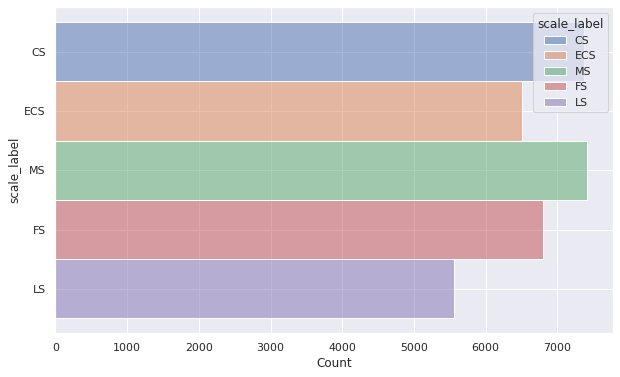

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(dfs, y = dfs['scale_label'], hue = 'scale_label');

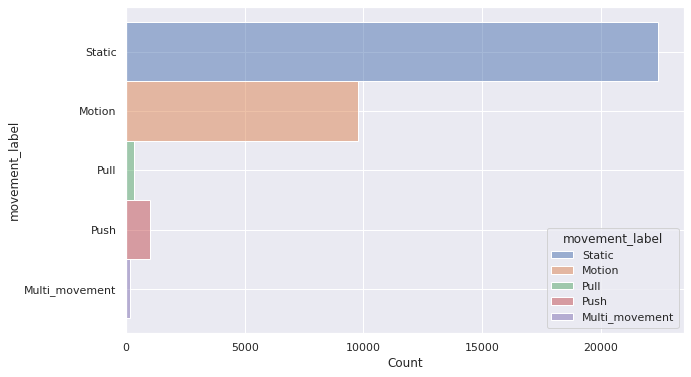

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(dfs, y = dfs['movement_label'], hue = 'movement_label');

### Multi movement:

In [3]:
import pandas as pd

dfs = pd.read_csv("dataset_video.csv")

In [4]:
# Number of Multi_movement videos

mk_mm = dfs['movement_label'] == 'Multi_movement'
dfs[mk_mm].shape[0]

160

We need to reverse the order of the frames and then mirror each video. With this technique we will be able to quadruple the data of "Multi movement" of which there is very little:

In [5]:
from IPython.display import Video
import random
num = random.randint(0,dfs[mk_mm].shape[0])
fol = (dfs[mk_mm]['dir'].sample(n=1, random_state = num)).iloc[0]
print("Movement Value: ", dfs[mk_mm]['movement_value'].sample(n=1, random_state = num).iloc[0])

Video(fol, width=400, height=300)

Movement Value:  3


### Push:

In [6]:
# Cantidad de Push

mk_ps = dfs['movement_label'] == 'Push'
dfs[mk_ps].shape[0]

993

In [11]:
num = random.randint(0,dfs[mk_ps].shape[0])
fol = (dfs[mk_ps]['dir'].sample(n=1, random_state = num)).iloc[0]
print("Movement Value: ", dfs[mk_ps]['movement_value'].sample(n=1, random_state = num).iloc[0])

Video(fol, width=400, height=300)

Movement Value:  1


### Pull:

In [9]:
# Cantidad de Pull

mk_pl = dfs['movement_label'] == 'Pull'
dfs[mk_pl].shape[0]

327

In [10]:
num = random.randint(0,dfs[mk_pl].shape[0])
fol = (dfs[mk_pl]['dir'].sample(n=1, random_state = num)).iloc[0]
print("Movement Value: ", dfs[mk_pl]['movement_value'].sample(n=1, random_state = num).iloc[0])

Video(fol, width=400, height=300)

Movement Value:  2


In [12]:
# Scenes < 8 frames

mk = dfs['frames'] < 8
dfs[mk]

,assignment,video,scene,scale_label,scale_value,movement_label,movement_value,frames,time(s),size(MB),dir
1112,train,tt2107865,0,LS,4,Static,4,4,0.13,0.07,./../data/train/tt2107865/shot_0000.mp4
6283,train,tt2573822,0,ECS,0,Static,4,4,0.16,0.07,./../data/train/tt2573822/shot_0000.mp4
7826,train,tt2852406,0,FS,3,Static,4,6,0.25,0.05,./../data/train/tt2852406/shot_0000.mp4
10609,train,tt3289126,0,ECS,0,Static,4,5,0.20,0.03,./../data/train/tt3289126/shot_0000.mp4
20918,val,tt2056520,0,ECS,0,Static,4,3,0.12,0.02,./../data/val/tt2056520/shot_0000.mp4
21908,val,tt2402163,0,LS,4,Static,4,3,0.12,0.10,./../data/val/tt2402163/shot_0000.mp4
23421,val,tt3469284,0,MS,2,Static,4,3,0.13,0.05,./../data/val/tt3469284/shot_0000.mp4
28293,test,tt2776170,0,LS,4,Static,4,4,0.16,0.20,./../data/test/tt2776170/shot_0000.mp4


### Data Analysis Trailer_V2

In [81]:
# Script to link the files to my trailer_v2 directory - FILES PULL - PUSH

import os
import json

def walkdir(folder):
    ''' Directories function '''
    for dirpath, _, files in os.walk(folder):
        for filename in files:
            yield (dirpath, filename)


pos = '/home/data-proyect/trailer_v2/'

os.makedirs('./../data/pull_push/', exist_ok=True)


# Counters
c_arch = 0
none = 0

# ---- Main program ----

for dir,filename in walkdir(pos):

    folder = dir + "/" + filename

    string = folder[len(folder)-23:len(folder)-14]

    c_arch = c_arch + 1
    src = os.path.join(folder)
    os.makedirs('./../data/pull_push/' + string, exist_ok=True)
    os.link(src, os.path.join('./../data/pull_push/', string + "/" + filename))

# Returns the number of folders for each assignment  
  
print('files: ', c_arch)

files:  606


In [52]:
# Example

from IPython.display import Video
Video('./../data/pull_push/tt1542344/shot_0055.mp4', width=400, height=300)

In [1]:
# Script for pull and push trailer V2

import pandas as pd
import os
import json

def walkdir(folder):
    ''' Directories function '''
    for dirpath, _, files in os.walk(folder):
        for filename in files:
            yield (dirpath, filename)


with open('/home/data-proyect/v2_full_trailer.json', 'r') as file:
    data_v2 = json.load(file)

df_pull_push = pd.DataFrame()

df_pull_push['dir'], df_pull_push['movement_label'], df_pull_push['movement_value'] = None, None, None

count=0
fol = r'./../data/pull_push/'

for direc, filename in walkdir(fol):
    folder=str(direc + "/" + filename)[len(str(direc+"/"+filename))-23:len(str(direc + "/" + filename))-14]
    dir_total = direc + "/" + filename
    scn = filename[5:9]
    count += 1
    
    for mov in data_v2[folder][scn]:
  
        d_movement_label = data_v2[folder][scn][mov]['label']
        d_movement_value = data_v2[folder][scn][mov]['value']

        data_pp = {'dir':dir_total, 
                   'movement_label':d_movement_label, 
                   'movement_value':d_movement_value, 
                  }
          
        df_pull_push = df_pull_push.append(data_pp, ignore_index=True)
print("Total files: ", count)


Total files:  606


In [ ]:
for i in data_v2:
    print(i)

In [2]:
df_pull_push.movement_label.value_counts()

Push    530
Pull     76
Name: movement_label, dtype: int64

In [3]:
import pandas as pd
df_pull_push.to_csv('pull_push.csv', index=False)

In [7]:
mkpp=df_pull_push['movement_label'] == 'Pull'

df_pull_push[mkpp]

,dir,movement_label,movement_value
3,./../data/pull_push/tt1582196/shot_0106.mp4,Pull,2
7,./../data/pull_push/tt3458220/shot_0010.mp4,Pull,2
8,./../data/pull_push/tt5967998/shot_0034.mp4,Pull,2
11,./../data/pull_push/tt4886338/shot_0024.mp4,Pull,2
14,./../data/pull_push/tt2006810/shot_0023.mp4,Pull,2
...,...,...,...
546,./../data/pull_push/tt2078727/shot_0048.mp4,Pull,2
569,./../data/pull_push/tt0071615/shot_0028.mp4,Pull,2
570,./../data/pull_push/tt0071615/shot_0048.mp4,Pull,2
574,./../data/pull_push/tt0073000/shot_0003.mp4,Pull,2


In [22]:
from IPython.display import Video
Video('./../data/pull_push/tt3087700/shot_0028.mp4', width=400, height=300)

In [8]:
mkpp=df_pull_push['movement_label'] == 'Push'

df_pull_push[mkpp]

,dir,movement_label,movement_value
0,./../data/pull_push/tt2136847/shot_0003.mp4,Push,3
1,./../data/pull_push/tt1542344/shot_0055.mp4,Push,3
2,./../data/pull_push/tt2344678/shot_0008.mp4,Push,3
4,./../data/pull_push/tt1827579/shot_0009.mp4,Push,3
5,./../data/pull_push/tt1872152/shot_0018.mp4,Push,3
...,...,...,...
601,./../data/pull_push/tt1156398/shot_0004.mp4,Push,3
602,./../data/pull_push/tt3292146/shot_0003.mp4,Push,3
603,./../data/pull_push/tt5157030/shot_0004.mp4,Push,3
604,./../data/pull_push/tt3087700/shot_0028.mp4,Push,3


From here we turn the pull_push file:

In [4]:
df_pull_push

,dir,movement_label,movement_value
0,./../data/pull_push/tt2136847/shot_0003.mp4,Push,3
1,./../data/pull_push/tt1542344/shot_0055.mp4,Push,3
2,./../data/pull_push/tt2344678/shot_0008.mp4,Push,3
3,./../data/pull_push/tt1582196/shot_0106.mp4,Pull,2
4,./../data/pull_push/tt1827579/shot_0009.mp4,Push,3
...,...,...,...
601,./../data/pull_push/tt1156398/shot_0004.mp4,Push,3
602,./../data/pull_push/tt3292146/shot_0003.mp4,Push,3
603,./../data/pull_push/tt5157030/shot_0004.mp4,Push,3
604,./../data/pull_push/tt3087700/shot_0028.mp4,Push,3


In [23]:
entrada = open('pull_push2.csv','wt')


for j in range(len(df_pull_push)):
    dirr = str((df_pull_push['dir'][j])[0:19] + "2 "+ (df_pull_push['dir'][j])[19:43])
    ml = str(df_pull_push['movement_label'][j])
    mv = str(df_pull_push['movement_value'][j])
    if ml == 'Pull':
        entrada.write(dirr + "," + "Push" + "," + mv + "\n")
    if ml == 'Push':
        entrada.write(dirr + "," + "Pull" + "," + mv + "\n")

entrada.close()

In [24]:
import pandas as pd

dfs = pd.read_csv("pull_push2.csv")

dfs

,dir,movement_label,movement_value
0,./../data/pull_push2/tt2136847/shot_0003.mp4,Pull,3
1,./../data/pull_push2/tt1542344/shot_0055.mp4,Pull,3
2,./../data/pull_push2/tt2344678/shot_0008.mp4,Pull,3
3,./../data/pull_push2/tt1582196/shot_0106.mp4,Push,2
4,./../data/pull_push2/tt1827579/shot_0009.mp4,Pull,3
...,...,...,...
601,./../data/pull_push2/tt1156398/shot_0004.mp4,Pull,3
602,./../data/pull_push2/tt3292146/shot_0003.mp4,Pull,3
603,./../data/pull_push2/tt5157030/shot_0004.mp4,Pull,3
604,./../data/pull_push2/tt3087700/shot_0028.mp4,Pull,3


In [28]:
mkk=dfs['dir'] =='./../data/pull_push2/tt0071939/shot_0077.mp4'
dfs[mkk]

,dir,movement_label,movement_value
307,./../data/pull_push2/tt0071939/shot_0077.mp4,Pull,3
